<a href="https://colab.research.google.com/github/SitiZumarohdf/PCVK_Genap_2023/blob/main/Week_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import folder yang ada di Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Import Library**


In [5]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

Membuat  fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element 
Dilasi (SED) berbentuk cross 3 x 3 **tanpa menggunakan library** morphology dari 
openCV

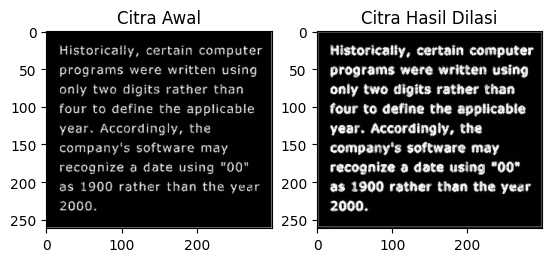

In [32]:
# DILASI TANPA LIBRARY
# Input image
img1 = cv2.imread('/content/drive/MyDrive/PCVK/Image/morphology.png')
def dilasi(img1):
    # inisialisasi kernel
    kernel = np.array([[0, 1, 0],
                       [1, 1, 1],
                       [0, 1, 0]], dtype=np.uint8)

    dilation = np.zeros_like(img1)

    # ukuran citra dan kernel
    m, n = img1.shape
    k, l = kernel.shape
    pad_h, pad_w = k//2, l//2

    # melakukan operasi dilasi
    for i in range(pad_h, m-pad_h):
        for j in range(pad_w, n-pad_w):
            temp = img1[i-pad_h:i+pad_h+1, j-pad_w:j+pad_w+1]
            temp = temp * kernel
            dilation[i, j] = np.max(temp)

    return dilation
# membaca citra
img1 = cv2.imread('/content/drive/MyDrive/PCVK/Image/morphology.png', 0)

# melakukan dilasi
dilated_img = dilasi(img1)

# menampilkan citra asli dan citra hasil dilasi
plt.subplot(1, 2, 1), plt.imshow(img1, cmap='gray'), plt.title('Citra Awal')
plt.subplot(1, 2, 2), plt.imshow(dilated_img, cmap='gray'), plt.title('Citra Hasil Dilasi')
plt.show()

Membuat program implementasi operasi dilasi Structuring Element Dilasi (SED) 
berbentuk cross 3 x 3 **dengan menggunakan library** morphology dari openCV

[[0 1 0]
 [1 1 1]
 [0 1 0]]


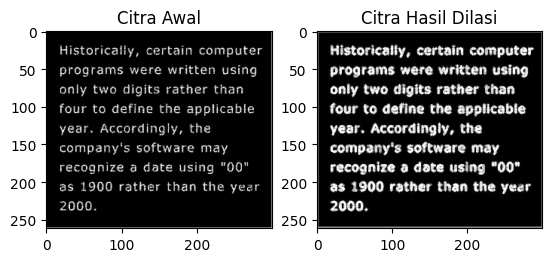

In [6]:
# DILASI DENGAN MENGGUNAKAN LIBRARY

# Input image
img1 = cv2.imread('/content/drive/MyDrive/PCVK/Image/morphology.png')
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
dilation = cv2.dilate(img1, kernel, iterations = 1)

#menampilkan citra asli dan citra hasil dilasi
print(kernel)
plt.subplot(121), plt.imshow(img1, cmap="gray"), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilation, cmap="gray"), plt.title('Citra Hasil Dilasi')
plt.show()

Membuat h fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element 
Erosi (SE) berbentuk square 5 x 5 **tanpa menggunakan library** morphology dari 
openCV

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


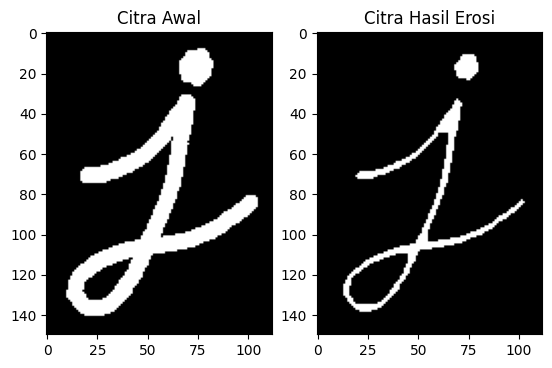

In [7]:
img2 = cv2.imread('/content/drive/MyDrive/PCVK/Image/j.png', cv2.IMREAD_GRAYSCALE)

# Menampilkan citra asli
plt.subplot(121)
plt.imshow(img2, cmap='gray')
plt.title('Citra Awal')

# Inisialisasi ukuran kernel dan citra hasil erosi
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), dtype=np.uint8)
erosion = np.zeros_like(img2)

# Konstanta padding
constant = (kernel_size - 1) // 2

# Operasi erosi
for i in range(constant, img2.shape[0] - constant):
    for j in range(constant, img2.shape[1] - constant):
        temp = img2[i - constant:i + constant + 1, j - constant:j + constant + 1]
        product = temp * kernel
        erosion[i, j] = np.min(product)

# Menampilkan citra hasil erosi
plt.subplot(122)
plt.imshow(erosion, cmap='gray')
plt.title('Citra Hasil Erosi')
print(kernel)
plt.show()

Membuat program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk 
square 5 x 5 **dengan menggunakan library** morphology dari openCV

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


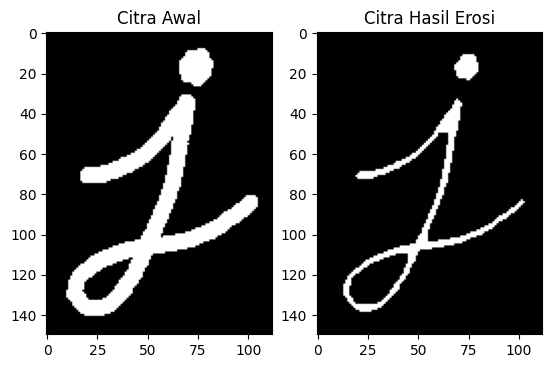

In [8]:
# EROSI DENGAN MENGGUNAKAN LIBRARY

# Input image
img2 = cv2.imread('/content/drive/MyDrive/PCVK/Image/j.png')
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
erosion = cv2.erode(img2, kernel,iterations = 1)

#Menampilkan citra awal dan citra hasil erosi
print(kernel)
plt.subplot(121), plt.imshow(img2, cmap="gray"), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion, cmap="gray"), plt.title('Citra Hasil Erosi')
plt.show()

Membuat program implementasi operasi opening dengan Structuring Element 
berbentuk square 3 x 3 **tanpa dan dengan** menggunakan library morphology dari 
openCV

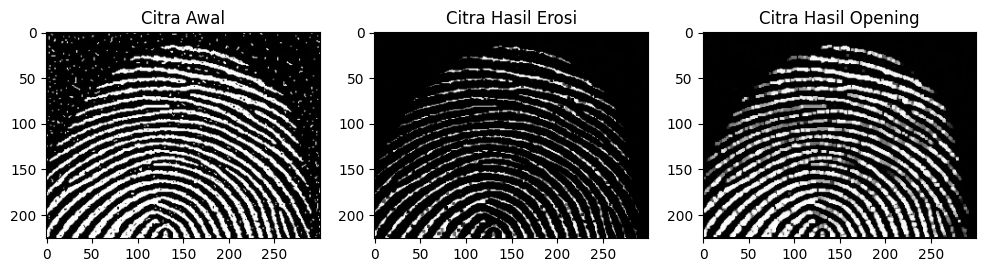

In [12]:
#TANPA MENGGUNAKAN LIBRARY
# Membaca image 
img3 = cv2.imread('/content/drive/MyDrive/PCVK/Image/fingerprint.png', 0)

#atribut array yang akan berisi m=tinggi/baris , n=lebar/kolom
m, n = img3.shape

# elemen Struktural
# k= 11,15,45 -Different sizes of the structuring element
k = 3
SE = np.ones((k,k), dtype=np.uint8)
constant = (k-1)//2

#digunakan untuk menampung hasil citra erosi
erosi = np.zeros((m,n), dtype=np.uint8)

#Perulangan dimana i = baris dan j= kolom
for i in range(constant, m-constant): #constant adalah tipe variable yang nilainya tidak dapat diubah
  for j in range(constant,n-constant):
    temp = img3[i-constant:i+constant+1, j-constant:j+constant+1] #temp digunakan untuk menampung atau menyimpan data untuk sementara
    product = temp * SE
    erosi[i,j] = np.min(product)

#Acquire size of the image
p, q= erosi.shape

#Define new image to store the pixels of dilated image
opening = np.zeros((p,q), dtype=np.uint8)

#Define the structuring element 
SED = np.array([[1,1,1], 
                [1,1,1], 
                [1,1,1]])
constant1 = 1

#Dilation operation without using inbuilt cv2 function
for i in range(constant1, p-constant1):
  for j in range(constant1,q-constant1):
    temp = erosi[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product = temp * SED
    opening[i,j] =np.max(product)

# Menampilkan gambar
plt.figure(figsize=(12,8))

plt.subplot(131), plt.imshow(img3, cmap="gray"), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(erosion, cmap="gray"), plt.title('Citra Hasil Erosi')
plt.subplot(133), plt.imshow(opening, cmap="gray"), plt.title('Citra Hasil Opening')
plt.show()

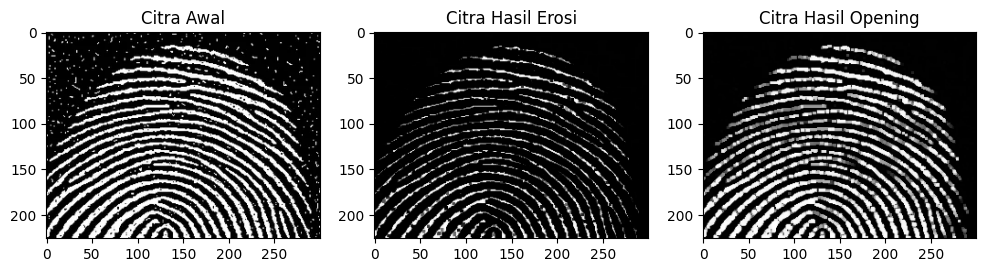

In [11]:
# DENGAN MENGGUNAKAN LIBRARY
# Input image
img3 = cv2.imread('/content/drive/MyDrive/PCVK/Image/fingerprint.png', 0)

# Erosi
#kernel elemen struktural dengan ukuran 3x3.
kernel = np.ones((3,3),np.uint8)
#hasil erosi akan di simpan dalam citra hasil erosi erosion.
erosion = cv2.erode(img3, kernel, iterations=1)

# Opening
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(img3, cv2.MORPH_OPEN, kernel)

# Menampilkan gambar
plt.figure(figsize=(12,8))

plt.subplot(131), plt.imshow(img3, cmap="gray"), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(erosion, cmap="gray"), plt.title('Citra Hasil Erosi')
plt.subplot(133), plt.imshow(opening, cmap="gray"), plt.title('Citra Hasil Opening')

plt.show()

Membuat program implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 **tanpa dan dengan** menggunakan library morphology dari openCV

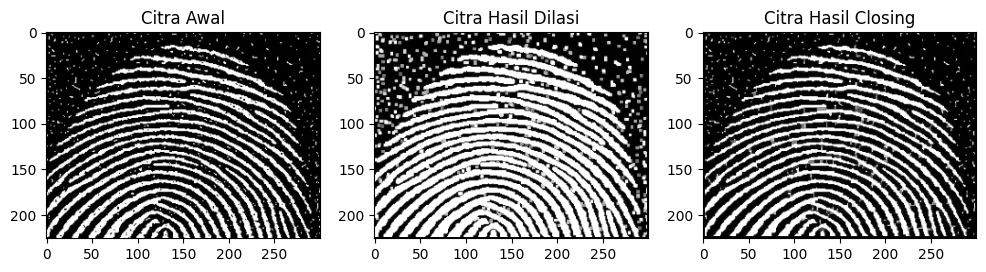

In [13]:
#OPERASI CLOSING TANPA LIBRARY
#Read the image for dilation
img_closing = cv2.imread('/content/drive/MyDrive/PCVK/Image/fingerprint.png', 0)

#Acquire size of the image
p, q = img_closing .shape

#Define new image to store the pixels of dilated image
dilate = np.zeros((p,q), dtype=np.uint8)

#Define the structuring element 
SED = np.array([[1,1,1], [1,1,1], [1,1,1]])
constant1 = 1

#Dilation operation without using inbuilt CV2 function
for i in range(constant1, p-constant1):
  for j in range(constant1,q-constant1):
    temp = img_closing [i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product = temp * SED
    dilate[i,j] = np.max(product)

#Acquire size of the image
m, n= dilate.shape 

# Define the structuring element
# k= 11,15,45 -Different sizes of the structuring element
k = 3
SE = np.ones((k,k), dtype=np.uint8)
constant = (k-1)//2

#Define new image
closing = np.zeros((m,n), dtype=np.uint8)

#Erosion without using inbuilt cv2 function for morphology
for i in range(constant, m-constant):
  for j in range(constant,n-constant):
    temp = dilate[i-constant:i+constant+1, j-constant:j+constant+1]
    product = temp * SE
    closing[i,j] = np.min(product)

# Menampilkan gambar
plt.figure(figsize=(12,8))

plt.subplot(131), plt.imshow(img3, cmap="gray"), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(dilate, cmap="gray"), plt.title('Citra Hasil Dilasi')
plt.subplot(133), plt.imshow(closing, cmap="gray"), plt.title('Citra Hasil Closing')
plt.show()

(<Axes: title={'center': 'Citra Hasil Closing'}>,
 Text(0.5, 1.0, 'Citra Hasil Closing'))

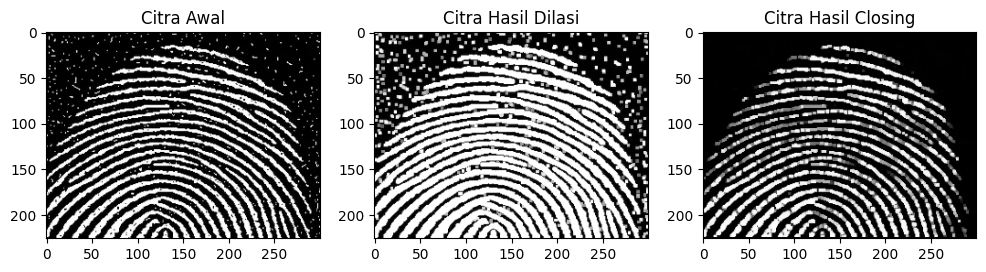

In [14]:
#OPERASI CLOSING DENGAN LIBRARY
img_closing  = cv2.imread('/content/drive/MyDrive/PCVK/Image/fingerprint.png', 0)

# Erosi
kernel = np.ones((3,3),np.uint8)
erosion = cv2.dilate(img3, kernel, iterations=1)

# Opening
kernel = np.ones((3,3),np.uint8)
closing = cv2.morphologyEx(img_closing , cv2.MORPH_CLOSE, kernel)

# Menampilkan gambar
plt.figure(figsize=(12,8))

plt.subplot(131), plt.imshow(img_closing , cmap="gray"), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(erosion, cmap="gray"), plt.title('Citra Hasil Dilasi')
plt.subplot(133), plt.imshow(opening, cmap="gray"), plt.title('Citra Hasil Closing')

Membuat program implementasi operasi dilasi dengan Structuring Element berbentuk 
Cross **3 x 3 dan 5 x 5**, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan 
gambar j.png) 


SED = Cross 3


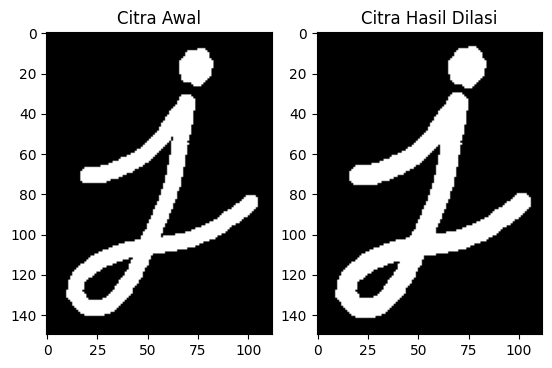

SED = Cross 5


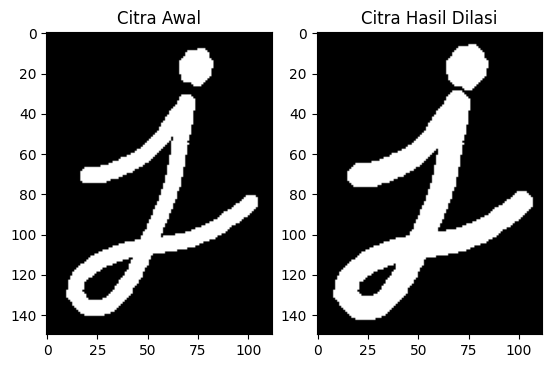

In [29]:
img_Cross = cv2.imread('/content/drive/MyDrive/PCVK/Image/j.png', 0)
# Dilation Cross 3x3
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
dilation = cv2.morphologyEx(img_Cross, cv2.MORPH_DILATE, kernel)

print("SED = Cross 3")
plt.subplot(121), plt.imshow(img_Cross, cmap="gray"), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilation, cmap="gray"), plt.title('Citra Hasil Dilasi')
plt.show()

# Dilation Cross 5x5
kernel2 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))
dilation2 = cv2.morphologyEx(img_Cross, cv2.MORPH_DILATE, kernel2)

print("SED = Cross 5")
plt.subplot(121), plt.imshow(img_Cross, cmap="gray"), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(dilation2, cmap="gray"), plt.title('Citra Hasil Dilasi')
plt.show()

Membuat program implementasi operasi dilasi dengan Structuring Element berbentuk 
**Circular 3 x 3 dan 5 x 5**, sehingga menghasilkan tampilan seperti di bawah ini: 
(Gunakan gambar j.png)

SED = Circle 3


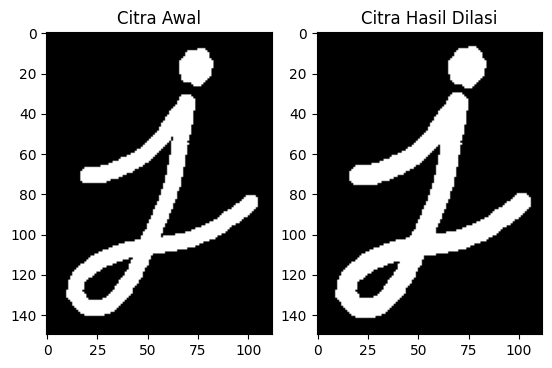

SED = Circle 5


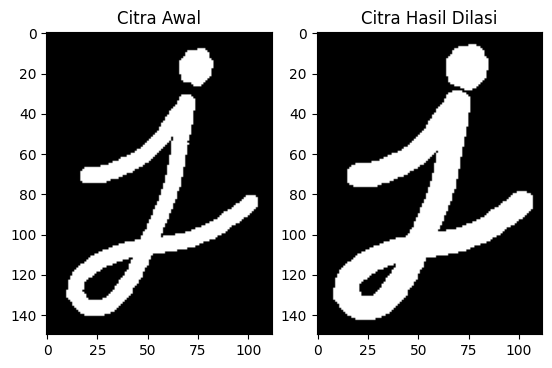

In [28]:
img_Circular = cv2.imread('/content/drive/MyDrive/PCVK/Image/j.png', 0)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
dilation = cv2.dilate(img_Circular,kernel,iterations = 1)
 
print("SED = Circle 3")
plt.subplot(121),plt.imshow(img_Circular, cmap="gray"),plt.title('Citra Awal')
plt.subplot(122),plt.imshow(dilation, cmap="gray"),plt.title('Citra Hasil Dilasi')
plt.show()

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
dilation = cv2.dilate(img_Circular,kernel,iterations = 1)
print("SED = Circle 5")
plt.subplot(121),plt.imshow(img_Circular, cmap="gray"),plt.title('Citra Awal')
plt.subplot(122),plt.imshow(dilation, cmap="gray"),plt.title('Citra Hasil Dilasi')
plt.show()

Membuat program implementasi operasi erosi dengan Structuring Element berbentuk 
**Rectangle 3 x 5 dan 5 x 7**, sehingga menghasilkan tampilan seperti di bawah ini: 
(Gunakan gambar j.png)

SED = Rectengle 3x5


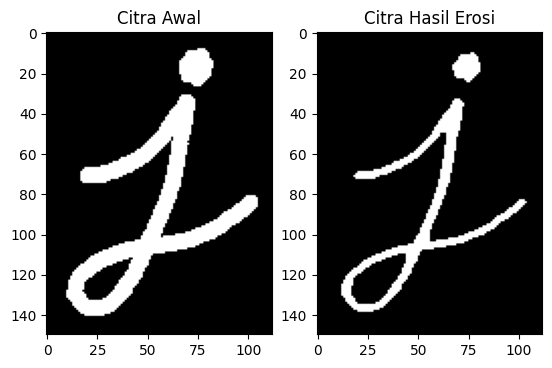

SED = Rectengle 5x7


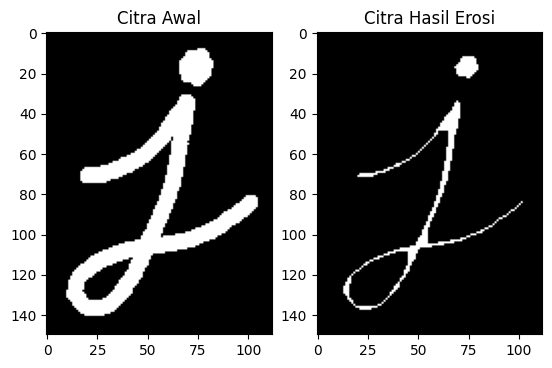

In [27]:
img_Rectangle = cv2.imread('/content/drive/MyDrive/PCVK/Image/j.png', 0)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,5))
erosion = cv2.erode(img_Rectangle,kernel,iterations = 1)
print("SED = Rectengle 3x5")
plt.subplot(121),plt.imshow(img_Rectangle, cmap="gray"),plt.title('Citra Awal')
plt.subplot(122),plt.imshow(erosion, cmap="gray"),plt.title('Citra Hasil Erosi')
plt.show()
 

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,7))
erosion = cv2.erode(img_Rectangle,kernel,iterations = 1)
print("SED = Rectengle 5x7")
plt.subplot(121),plt.imshow(img_Rectangle, cmap="gray"),plt.title('Citra Awal')
plt.subplot(122),plt.imshow(erosion, cmap="gray"),plt.title('Citra Hasil Erosi')
plt.show()

Membuat program implementasi operasi erosi dengan Structuring Element berbentuk 
**Line Vertikal 3 dan 5**, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan 
gambar j.png) 

SE = Line Vertikal 3


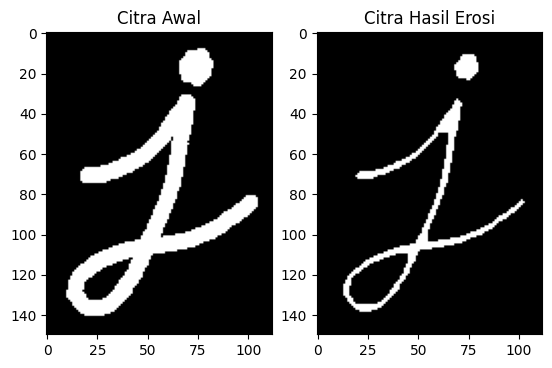

SE = Line Vertikal 5


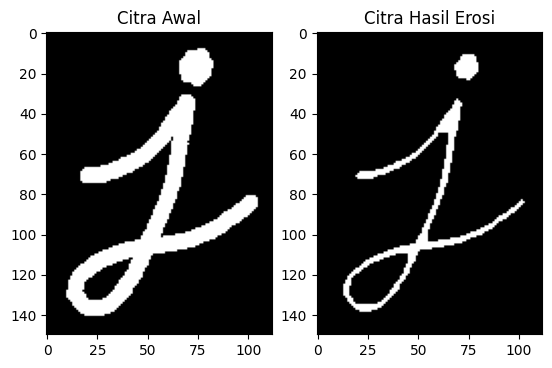

In [24]:
img_Line_Vertikal = cv2.imread('/content/drive/MyDrive/PCVK/Image/j.png', cv2.IMREAD_GRAYSCALE)
m,n= img_Line_Vertikal.shape 

k=3
SE= np.ones((k,k), dtype=np.uint8)
constant= (k-1)//2

imgErode= np.zeros((m,n), dtype=np.uint8)

for i in range(constant, m-constant):
  for j in range(constant,n-constant):
    temp= img_Line_Vertikal[i-constant:i+constant+1, j-constant:j+constant+1]
    product= temp*SE
    imgErode[i,j]= np.min(product)
    m,n= img_Line_Vertikal.shape 

k=5
SE= np.ones((k,k), dtype=np.uint8)
constant= (k-1)//2

imgErode= np.zeros((m,n), dtype=np.uint8)

for i in range(constant, m-constant):
  for j in range(constant,n-constant):
    temp= img_Line_Vertikal[i-constant:i+constant+1, j-constant:j+constant+1]
    product= temp*SE
    imgErode[i,j]= np.min(product)
print("SE = Line Vertikal 3")
plt.subplot(121), plt.imshow(img_Line_Vertikal, cmap ="gray"), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(imgErode, cmap="gray"), plt.title('Citra Hasil Erosi')
plt.show()
print("SE = Line Vertikal 5")
plt.subplot(121), plt.imshow(img_Line_Vertikal, cmap ="gray"), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(imgErode, cmap="gray"), plt.title('Citra Hasil Erosi')
plt.show()
     